# Thư viện

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Khởi tạo tham số

In [3]:
np.random.seed(123)                             # Seed for random number generator
x = np.random.randint(2, size = 1000)           # Chuỗi nhị phân dữ liệu độ dài 1000
xplot = np.random.randint(2, size = 25)         # Chuỗi 25 bit đầu tiên để visualize
for i in range(25):
    xplot[i] = x[i]
n = len(x)                                      # n = 1000
nplot = len(xplot)                              # nplot = 25
Tb = 100;                                       # thời gian truyền 1 bit
nb = 100;                                       # số mẫu lấy mỗi bit
br = 1/Tb;                                      # Bit rate  (Hz)
f = 2*br                                        # Carrier frequency (Hz) (>= 2*br, theo Nyquist)

t = Tb*np.arange(0,n,1/nb)                      # thời gian truyền
tplot = Tb*np.arange(0,nplot,1/nb)

# 1. Điều chế BPSK

## 1.1. Chùm tín hiệu

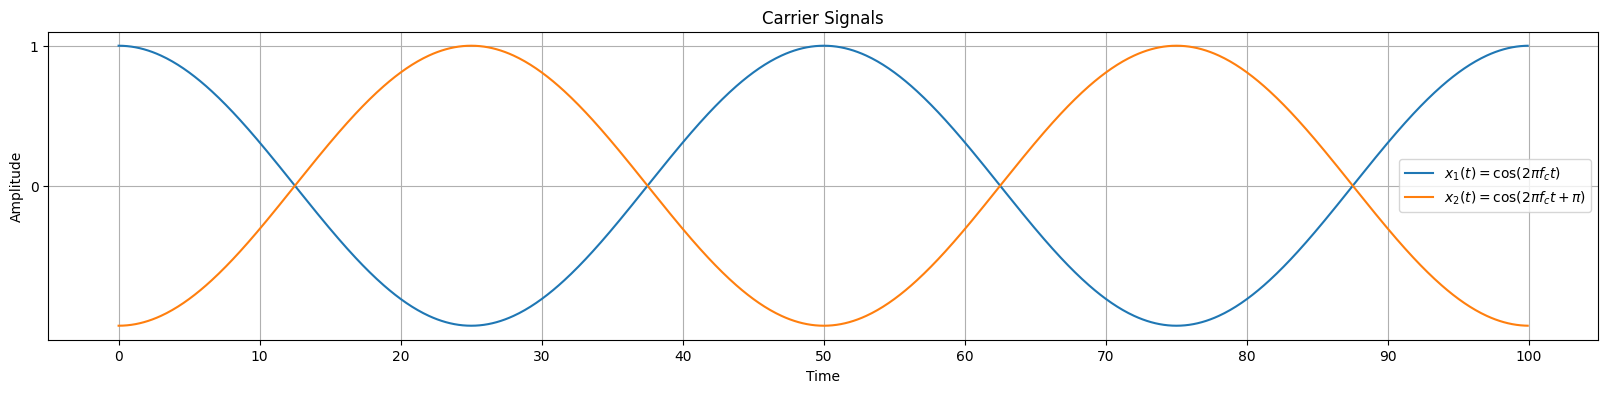

In [4]:
# chùm tín hiệu
x1 = np.cos(2*np.pi*f*t);             # tín hiệu cho bit '1'
x2 = np.cos(2*np.pi*f*t + np.pi);     # tín hiệu cho bit '0'
x1plot = np.cos(2*np.pi*f*tplot)
x2plot = np.cos(2*np.pi*f*tplot + np.pi); 

# plot the carrier signal for 1 bit period
plt.figure(figsize=(20,4))
t_  = Tb*np.arange(0,1,1/nb)
plt.plot(t_,np.cos(2*np.pi*f*t_))
plt.plot(t_,np.cos(2*np.pi*f*t_ + np.pi))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0,Tb+Tb/10,Tb/10))
plt.yticks([0,1])
plt.grid(True)
plt.title('Carrier Signals')
plt.legend(['$x_1(t) = \cos(2\pi f_c t)$','$x_2(t) = \cos(2\pi f_c t + \pi)$'])
plt.show()

## 1.2. Chuỗi nhị phân dữ liệu

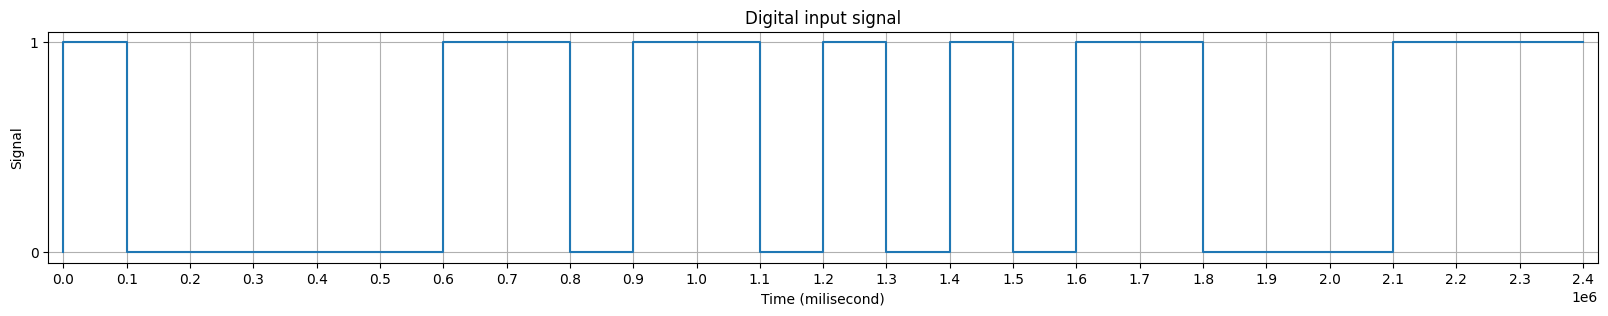

In [6]:
digitplot = np.empty(shape=0, dtype=int); 
for i in range(0,nplot,1):
    if xplot[i] == 1:
        digitplot =np.append(digitplot,np.ones(nb))
    else:
        digitplot =np.append(digitplot,np.zeros(nb))

digit = np.empty(shape=0, dtype=int); 
for i in range(0,n,1):
    if x[i] == 1:
        digit =np.append(digit,np.ones(nb))
    else:
        digit =np.append(digit,np.zeros(nb))

#  vẽ xung 25 bit đầu tiên
plt.figure(figsize = (20, 3))   
plt.title('Digital input signal')
plt.xticks(1000*np.arange(0,Tb*nplot,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*nplot,Tb), xplot)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.show()

In [7]:
for i in range(n):
    print(x[i], end=' ')

0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 

## 1.3. Điều chế PSK và vẽ tín hiệu được điều chế

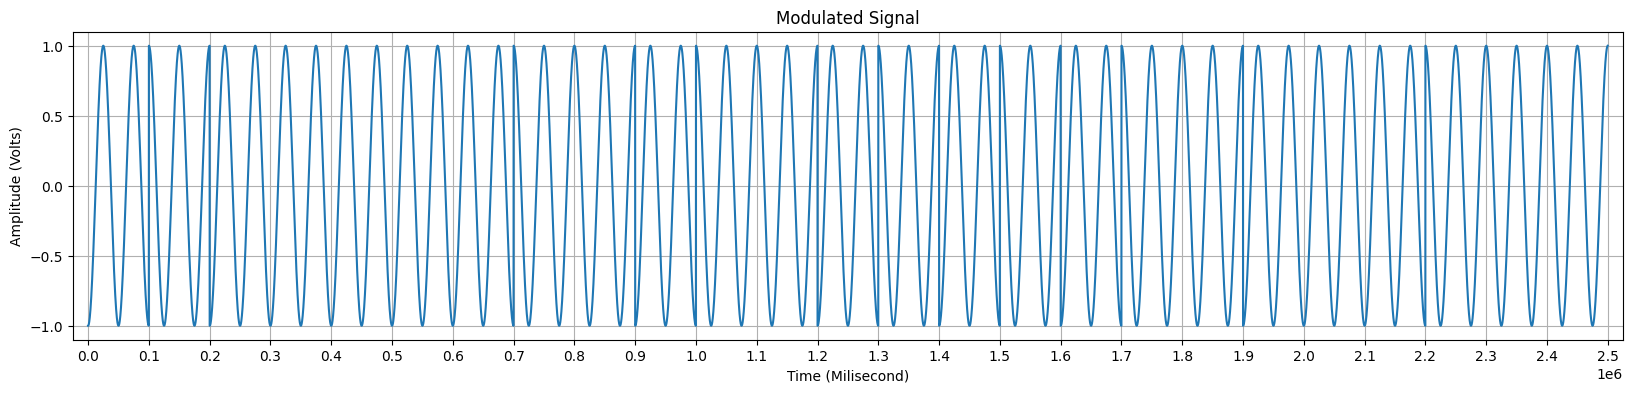

In [8]:
# điều chế BPSK
modplot = np.where(digitplot == 1, x1plot, x2plot)
mod = np.where(digit == 1, x1, x2)

# vẽ tín hiệu được điều chế
plt.figure(figsize=(20,4))
plt.plot(1000*tplot,modplot)
plt.xlabel('Time (Milisecond)')
plt.ylabel('Amplitude (Volts)')
plt.xticks(1000*np.arange(0,Tb*nplot+Tb,Tb))
plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
plt.title('Modulated Signal')
plt.margins(x=0.01, y=0.05)
plt.show()

# 2. Giải điều chế BPSK

In [9]:
# Hàm giải điều chế
def demodulate(rho, size):
    d = np.empty(shape = size, dtype=int)
    for i in range(0, size*nb, nb):
        y = np.trapz(rho[i:i+nb]*x1[i:i+nb])         # y = sqrt(Eb)*hình chiếu của tín hiệu rho lên cơ sở
        if y < 0:
            d[np.floor(i/nb).astype('int')] = 0      # Tiêu chuẩn ML, y thuộc vùng Voronoi của x2
        else:
            d[np.floor(i/nb).astype('int')] = 1
    return d

# 3. Điều chế và giải điều chế BPSK dưới tác động nhiễu trong mô hình kênh AWGN 

## 3.1. Điều chế và vẽ tín hiệu thu được

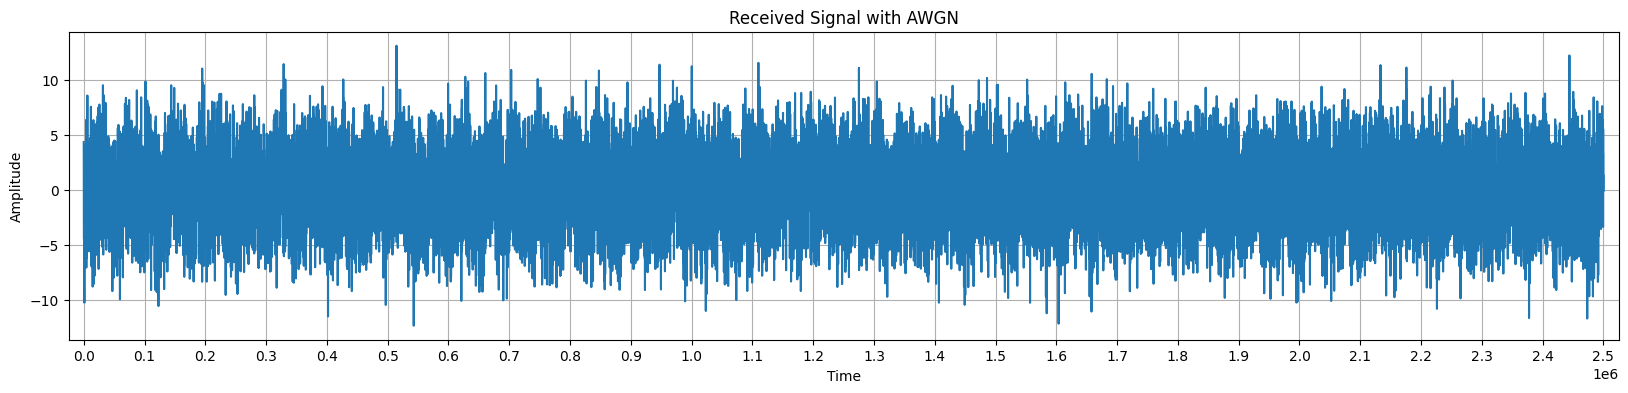

In [11]:
# thêm nhiễu vào tín hiệu truyền đi
N0 = 20              # năng lượng nhiễu
var = np.sqrt(N0/2)
noise = np.random.normal(0, var, len(mod))
noise_mod_plot = noise[0:nplot*nb]

mod_noise = mod + noise
mod_noise_plot = modplot + noise_mod_plot

# plot tín hiệu nhận được
plt.figure(figsize=(20,4))
plt.plot(1000*tplot,mod_noise_plot)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xticks(1000*np.arange(0,Tb*nplot+Tb,Tb))
plt.grid(True)
plt.title('Received Signal with AWGN')
plt.margins(x=0.01, y=0.05)
plt.show()

## 3.2. Giải điều chế

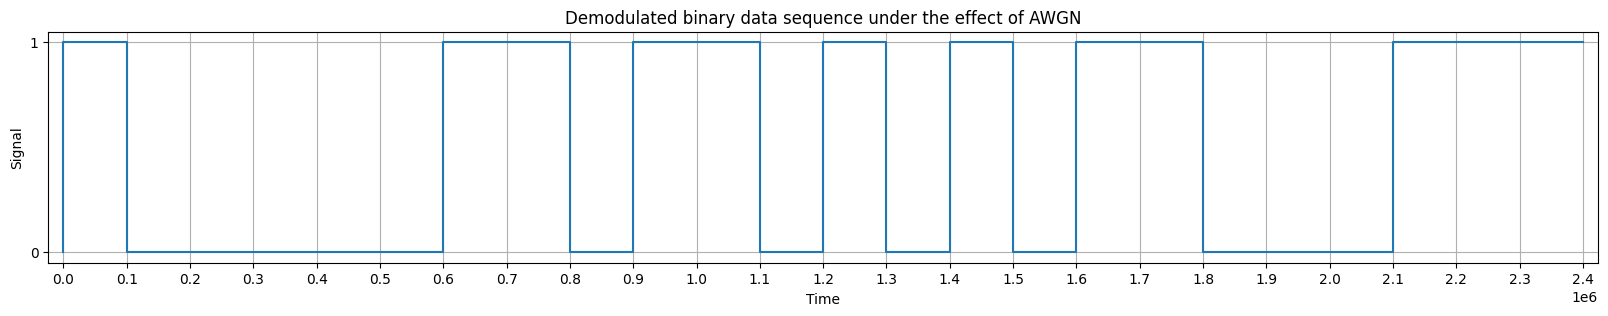

In [12]:
# giải điều chế
demod_noise = demodulate(mod_noise, n)
demod_noise_plot = demodulate(mod_noise_plot, nplot)

# vẽ xung 25 bit đầu tiên sau khi giải điều chế
plt.figure(figsize = (20, 3))   
plt.title('Demodulated binary data sequence under the effect of AWGN')
plt.xticks(1000*np.arange(0,Tb*nplot,Tb))
plt.xlabel('Time')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*nplot,Tb), demod_noise_plot)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.show()

In [13]:
for i in range(n):
    print(demod_noise[i], end=' ')

0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 

## 3.3. Tính tỉ lệ lỗi thực nghiệm

In [15]:
Pb = np.count_nonzero(demod_noise - x) / len(x)
print(f"Bit Error Rate: {Pb*100}%")

Bit Error Rate: 0.0%


In [20]:
Eb = Tb/2
print(Eb)
print(1/2 *erfc(np.sqrt(Eb/N0)))

50.0
0.012673659338734126


# 4. So sánh BER thực nghiệm và lý thuyết

In [13]:
def add_awgn(mod, std):
    noise = np.random.normal(0, std, len(mod))
    return mod + noise

In [21]:
snr_db = np.arange(-20,9,0.5)                           # trục SNR, đon vị db
ber = np.zeros_like(snr_db).astype('double')            # trục BER
sigma = np.zeros_like(snr_db).astype('double')
Eb = 1/2 * (Tb)

# chạy thực nghiệm trên 1000 bit và tính kết quả BER thực nghiệm
for i in range(len(snr_db)):
    sigma[i] = np.sqrt(1/2 * Eb / (10**(snr_db[i]/10)))     # std nhiễu hay sqrt(N0/2)
    mod_noise = add_awgn(mod, sigma[i])
    demod_noise  = demodulate(mod_noise, n)
    ber[i] = np.count_nonzero(demod_noise - x) / len(x)     #BER thực nghiệm

## 4.2 Plot the BER simulation and BER theory for 2-PSK

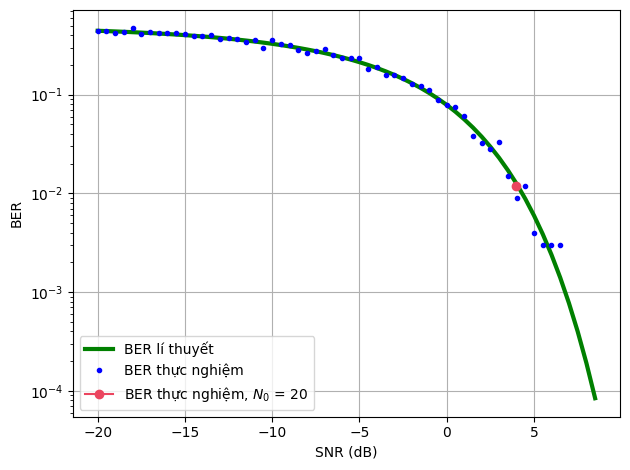

In [22]:
ber_theory = 1/2 * erfc(np.sqrt(10**(snr_db/10)))       # đường BER lí thuyết
plt.semilogy(snr_db, ber_theory, 'g-', linewidth = 3)   # plot đường BER lý thuyết
plt.semilogy(snr_db, ber, 'b.')                         # plot các kết quả BER thực nghiệm 
plt.plot(10*np.log10(Eb/20), Pb, color = '#EB455F', marker = 'o') # plot BER trong chương 3
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
plt.tight_layout()
plt.legend(['BER lí thuyết', 'BER thực nghiệm', 'BER thực nghiệm, $N_0$ = 20'])
plt.show()